# Vulcões em Vênus

Nesse notebook iremos abordar uma solução para o problema [*Volcanoes on Venus* do Kaggle](https://www.kaggle.com/fmena14/volcanoesvenus). O dataset consiste em imagens de sonda do planeta Vênus e o problema consiste em predizer se uma determinada imagem contém pelo menos um vulcão ou não. 

#### Bibliotecas e ferramentas

In [17]:
import cv2
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
import math

#### Ler dados de treino e teste
Os dados já estão separados, em treino e teste, entre imagens e *labels* (se a respectiva imagem contém pelo menos um vulcão ou não). Observe que para os *labels* estamos usando apenas a primeira coluna do dataset, pois as demais não são importantes para o problema.

In [2]:
X_train = pd.read_csv("data/train_images.csv", header=None)
y_train = pd.read_csv("data/train_labels.csv")["Volcano?"]
X_test = pd.read_csv("data/test_images.csv", header=None)
y_test = pd.read_csv("data/test_labels.csv")["Volcano?"]

#### Lidando com dados desbalanceados
A proporção de não-vulcões é muito maior que a de vulcões. Resolvemos isso com um *down-sample* na classe majoritária.

In [3]:
###

#### Análise de Componentes Principais
Para reduzir a dimensionalidade das imagens (110 x110), usaremos PCA. Usamos **2000** componentes porque os primeiros **700** autovetores retém **~96%** da variância.

In [4]:
pca = PCA(n_components=2000)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Treinamento com SVM
Agora usamos os dados transformados para treinar e testar o modelo, com o método SVM.

In [25]:
svm = SVC(C=1e-06, kernel='linear')
svm.fit(X_train_pca, y_train)

SVC(C=1e-06, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
import dlib 
def get_score(p_C):
    svm = SVC(C=p_C, kernel='linear')
    svm.fit(X_train_pca, y_train)
    pred = svm.predict(X_test_pca)
    return accuracy_score(y_test, pred)
C, score = dlib.find_max_global(get_score, [1e-10],[1e-05], 20)
print("C = {}, score = {}".format(C, score))

C = [1.2437557466789524e-06], score = 0.9330651060716898


### Testes
Resultados das predições no conjunto de testes

In [26]:
pred = svm.predict(X_test_pca)
print(classification_report(y_test, pred))
print("Score: {}".format(accuracy_score(y_test, pred)))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      2300
          1       0.88      0.65      0.75       434

avg / total       0.93      0.93      0.93      2734

Score: 0.9312362838332114


In [ ]:
X_train_hist = [np.histogram(np.uint8(X_train.values), bins=range(256)) for x in X_train.values]
#X_train_hist = np.vstack(np.apply_along_axis(lambda x: np.histogram(x, bins=range(256)), 0, X_train.values)
#X_test_hist = np.apply_along_axis(lambda x: np.histogram(x, bins=range(256)), 0, X_test.values)

In [ ]:
X_train_hist

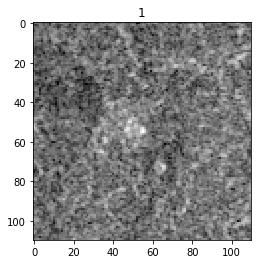

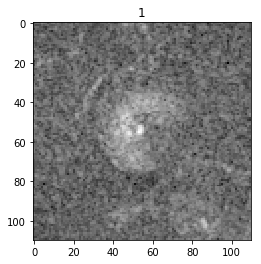

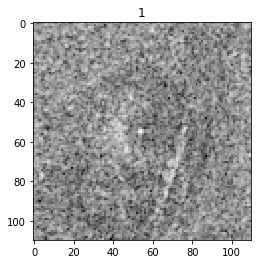

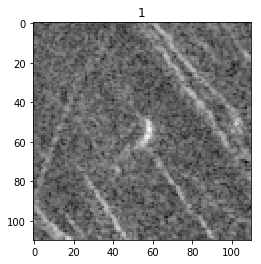

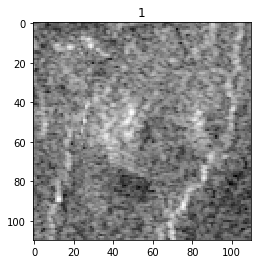

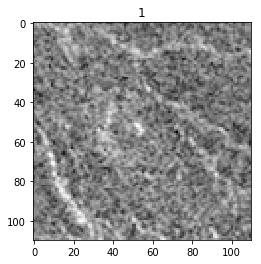

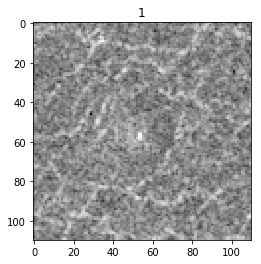

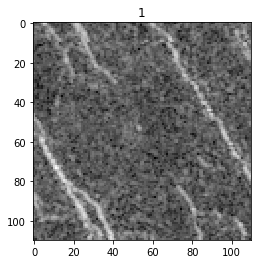

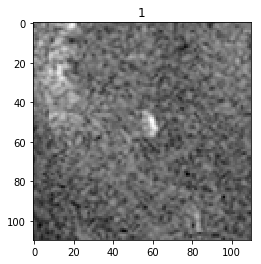

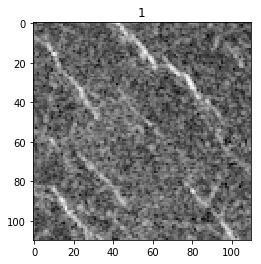

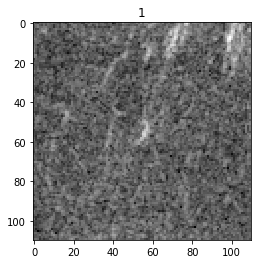

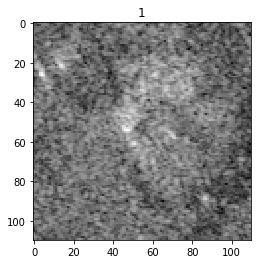

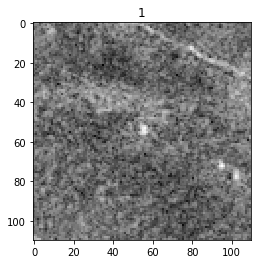

In [95]:
for i in range(100):
    if y_train.iloc[i]==0:
        continue
    img = np.uint8(X_train.iloc[i,:])
    plt.imshow(img.reshape(110,110), cmap='gray')
    plt.title(y_train.iloc[i])
    plt.show()

In [28]:
svm2 = SVC(C=1e-06, kernel='linear')
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      2300
          1       0.86      0.66      0.75       434

avg / total       0.93      0.93      0.92      2734

